In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
import os
os.chdir('D:/ETLHIVE/Datasets')

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [9]:
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
df.shape

(50, 5)

In [13]:
df.describe()

,RND,ADMIN,MKT,PROFIT
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [14]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

## PROFIT ~ RND

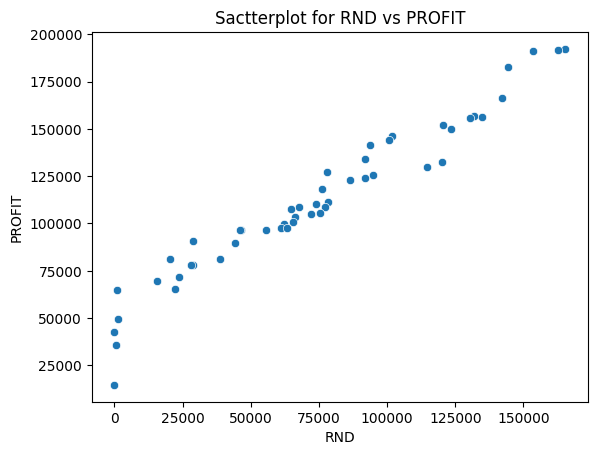

In [16]:
sns.scatterplot(data=df, x='RND', y="PROFIT")
plt.title('Sactterplot for RND vs PROFIT')
plt.show()

### Seperate X and Y features
X = RND
Y = PROFIT

In [19]:
x = df[['RND']]
x.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [21]:
y = df[['PROFIT']]
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Create Linear regression model

In [24]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

#### Coefficient and Intercept

In [25]:
model.intercept_

array([49032.89914125])

In [26]:
model.coef_

array([[0.85429137]])

### PROFIT_pred = 49032.89 + 0.8543*RND
RND increase by 1000, PROFIT increased by 854.3

### Checking model R2 Score

In [28]:
model.score(x,y)

0.9465353160804393

### Perform other evaluations on model
1. Mean Squared Error
2. Mean Absolute Error
3. Root Mean Squared Error
4. R2 Score

In [30]:
ypred = model.predict(x)
ypred

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032],
       [161694.19683741],
       [164033.72501421],
       [160345.46724972],
       [152011.33380847],
       [154396.82286103],
       [136096.36397105],
       [135036.08586475],
       [129219.89081021],
       [127621.20411029],
       [151499.37407569],
       [146869.43093301],
       [115678.82583435],
       [129897.69412683],
       [127413.41482014],
       [122860.50313037],
       [114175.91374003],
       [116000.34693472],
       [112245.81324567],
       [106725.35677792],
       [114850.93206678],
       [104275.40289851],
       [113385.70276482],
       [110633.79960036],
       [105460.14271464],
       [105079.09459155],
       [101994.24845109],
       [101261.18102569],
       [103202.54108032],
       [ 96440.90176556],
       [ 88694.29012885],
       [ 88342.27936946],
       [ 73520.10196791],
       [ 86681.47714396],
       [ 663

In [31]:
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [32]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
mse = mean_squared_error(y,ypred)
mse

85120931.32706906

In [36]:
rmse = mse**(1/2)
rmse

9226.100548285232

In [37]:
mae = mean_absolute_error(y,ypred)
mae

6910.98435457961

In [39]:
r2 = r2_score(y, ypred)
r2

0.9465353160804393

### Checking how line is fitted

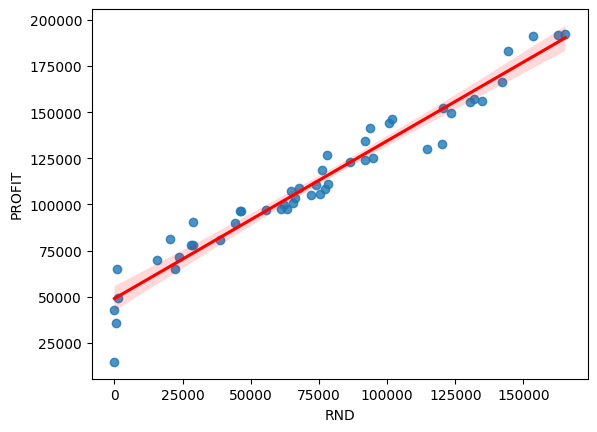

In [41]:
sns.regplot(data=df, x='RND', y='PROFIT', line_kws={'color':'red'})
plt.show()

### PROFIT and RND have a strong Linear Relationship because R2 score is 0.9465

### Predict the new values

In [43]:
RND = [[160000]]
profit_pred = model.predict(RND)
profit_pred

array([[185719.51849146]])